=== Docking Results ===
        Ligand  Docking_Score
0    Ligand_1          -9.00
1    Ligand_2          -4.39
2    Ligand_3          -6.14
3    Ligand_4          -7.21
4    Ligand_5         -10.75
5    Ligand_6         -10.75
6    Ligand_7         -11.54
7    Ligand_8          -5.07
8    Ligand_9          -7.19
9   Ligand_10          -6.34
10  Ligand_11         -11.84
11  Ligand_12          -4.24
12  Ligand_13          -5.34
13  Ligand_14         -10.30
14  Ligand_15         -10.55
15  Ligand_16         -10.53
16  Ligand_17          -9.57
17  Ligand_18          -7.80
18  Ligand_19          -8.54
19  Ligand_20          -9.67 



C:\Users\kakad\AppData\Local\Temp\ipykernel_3344\2468440612.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Ligand", y="Docking_Score", data=docking_df, palette="viridis")


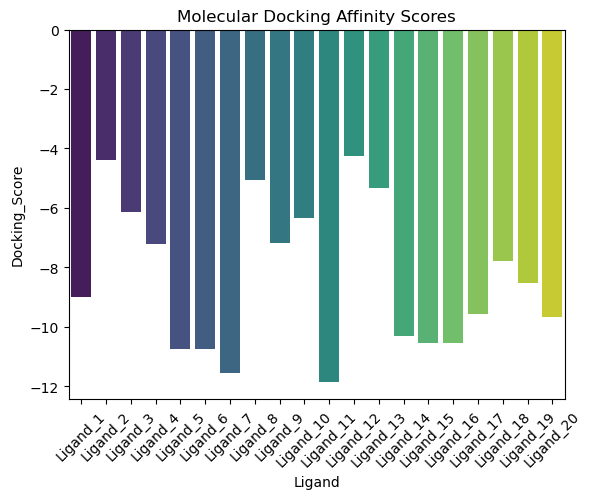

Best Candidate:
 Ligand           Ligand_11
Docking_Score       -11.84
Name: 10, dtype: object 

=== Genomic ML Results ===
Accuracy: 0.43333333333333335
              precision    recall  f1-score   support

           0       0.62      0.40      0.48        20
           1       0.29      0.50      0.37        10

    accuracy                           0.43        30
   macro avg       0.45      0.45      0.43        30
weighted avg       0.51      0.43      0.45        30



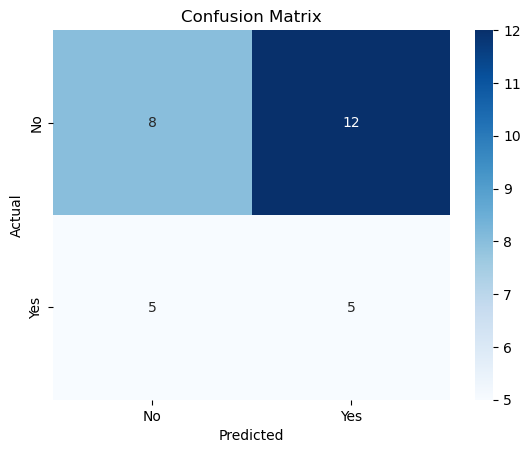

--- Conclusion ---
Best Ligand: Ligand_11 (-11.84 kcal/mol)
Random Forest Accuracy: 43.33%


In [3]:
# Molecular Docking + Genomic ML Simulation (Simplified Demo)
# Requirements: pip install numpy pandas matplotlib seaborn scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

np.random.seed(42)

# 1. Molecular Docking Simulation
ligands = [f"Ligand_{i}" for i in range(1, 21)]
scores = np.round(np.random.uniform(-12, -4, 20), 2)
docking_df = pd.DataFrame({"Ligand": ligands, "Docking_Score": scores})
print("=== Docking Results ===\n", docking_df, "\n")

# Plot docking affinity scores
sns.barplot(x="Ligand", y="Docking_Score", data=docking_df, palette="viridis")
plt.xticks(rotation=45)
plt.title("Molecular Docking Affinity Scores")
plt.show()

# Find best ligand (lowest docking score)
best = docking_df.loc[docking_df["Docking_Score"].idxmin()]
print("Best Candidate:\n", best, "\n")

# 2. Genomic ML Simulation
X, y = np.random.randint(0, 2, (100, 10)), np.random.randint(0, 2, 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate model performance
print("=== Genomic ML Results ===")
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3. Conclusion
print(f"--- Conclusion ---\nBest Ligand: {best['Ligand']} ({best['Docking_Score']} kcal/mol)")
print(f"Random Forest Accuracy: {acc*100:.2f}%")
